# Solving f(x) = mx + c = 0 using the Bisection Method and Plotting Iterations

## Import necessary libraries

In [5]:
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations

## Step 1: Input the slope (m) and y-intercept (c)

In [6]:
print("This program solves f(x) = mx + c = 0 using the Bisection Method.\n")
# Taking input for slope (m) and y-intercept (c)
m = float(input("Enter the slope of the line (m): "))  # Slope of the line
c = float(input("Enter the y-intercept (c): "))       # Y-intercept of the line

This program solves f(x) = mx + c = 0 using the Bisection Method.



Enter the slope of the line (m):  2
Enter the y-intercept (c):  3


## Step 2: Define the function f(x) = mx + c

In [7]:
def f(x):
    """
    Function to calculate f(x) = mx + c
    """
    return m * x + c

## Step 3: Automatically find p1 and p2 (where f(p1) and f(p2) have opposite signs)

In [8]:
print("\nFinding two points p1 and p2 where f(x) changes its sign...\n")
# Range to search for p1 and p2
x_min = -100  # Minimum value of x
x_max = 100   # Maximum value of x
step_size = 0.01  # Smaller precision for better accuracy

# Initialize p1 and p2
p1 = None
p2 = None

# Loop to automatically find p1 and p2
for x in np.arange(x_min, x_max, step_size):
    x1 = x
    x2 = x1 + step_size  # Next point
    
    # Check for sign change
    if f(x1) * f(x2) < 0:
        p1 = x1
        p2 = x2
        break

if p1 is None or p2 is None:
    print("No root found in the given range. Try increasing the search range or check inputs.")
    exit()

print(f"Found values: p1 = {p1}, p2 = {p2}\n")


Finding two points p1 and p2 where f(x) changes its sign...

Found values: p1 = -1.5099999999496134, p2 = -1.4999999999496134



## Step 4: Bisection Method to find the root and track iterations

In [9]:
print("Starting Bisection Method...\n")
print(f"{'Step':^6} {'p1':^12} {'p2':^12} {'Midpoint':^12} {'f(Midpoint)':^15}")
print("-" * 60)

# Lists to track iteration number and interval size
iteration_numbers = []
interval_sizes = []

# Bisection process
step = 1  # Step counter
while abs(p2 - p1) > 1e-6:
    midpoint = (p1 + p2) / 2.0
    f_mid = f(midpoint)
    
    # Print current step
    print(f"{step:^6} {p1:^12.6f} {p2:^12.6f} {midpoint:^12.6f} {f_mid:^15.6e}")
    
    # Update interval based on f(midpoint)
    if f(p1) * f_mid < 0:
        p2 = midpoint
    else:
        p1 = midpoint
    
    # Record iteration data
    iteration_numbers.append(step)
    interval_sizes.append(abs(p2 - p1))
    
    step += 1

# Final root
root = (p1 + p2) / 2.0
print("\nThe root of the equation f(x) = mx + c = 0 is approximately:")
print(f"Root = {root:.6f}")

Starting Bisection Method...

 Step       p1           p2        Midpoint     f(Midpoint)  
------------------------------------------------------------
  1     -1.510000    -1.500000    -1.505000    -1.000000e-02 
  2     -1.505000    -1.500000    -1.502500    -5.000000e-03 
  3     -1.502500    -1.500000    -1.501250    -2.500000e-03 
  4     -1.501250    -1.500000    -1.500625    -1.250000e-03 
  5     -1.500625    -1.500000    -1.500312    -6.249999e-04 
  6     -1.500312    -1.500000    -1.500156    -3.124999e-04 
  7     -1.500156    -1.500000    -1.500078    -1.562499e-04 
  8     -1.500078    -1.500000    -1.500039    -7.812490e-05 
  9     -1.500039    -1.500000    -1.500020    -3.906240e-05 
  10    -1.500020    -1.500000    -1.500010    -1.953115e-05 
  11    -1.500010    -1.500000    -1.500005    -9.765524e-06 
  12    -1.500005    -1.500000    -1.500002    -4.882712e-06 
  13    -1.500002    -1.500000    -1.500001    -2.441305e-06 
  14    -1.500001    -1.500000    -1.5000

## Step 5: Plot the iterations vs interval size


Plotting the convergence graph...



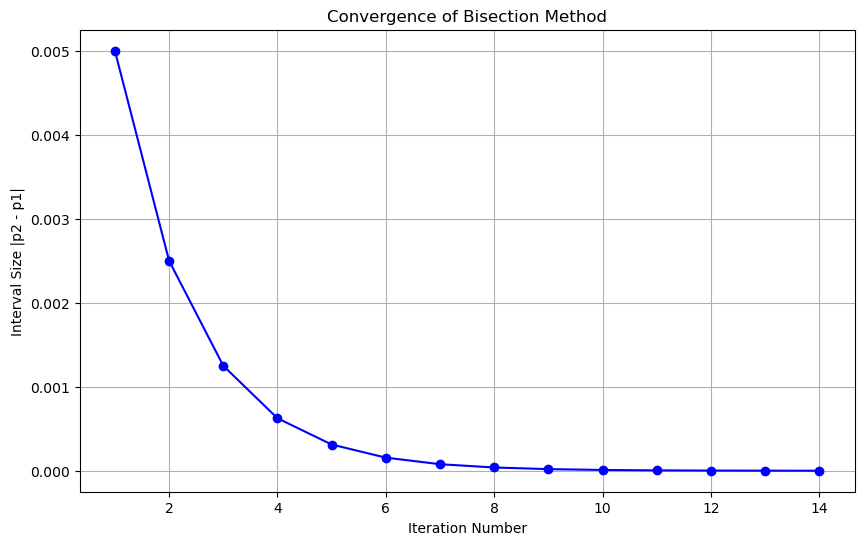

In [10]:
print("\nPlotting the convergence graph...\n")
# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(iteration_numbers, interval_sizes, marker='o', linestyle='-', color='blue')
plt.title("Convergence of Bisection Method")
plt.xlabel("Iteration Number")
plt.ylabel("Interval Size |p2 - p1|")
plt.grid(True)
plt.show()

## Step 6: Plot the function f(x) = mx + c and mark the root


Plotting the function f(x) = mx + c and marking the root...



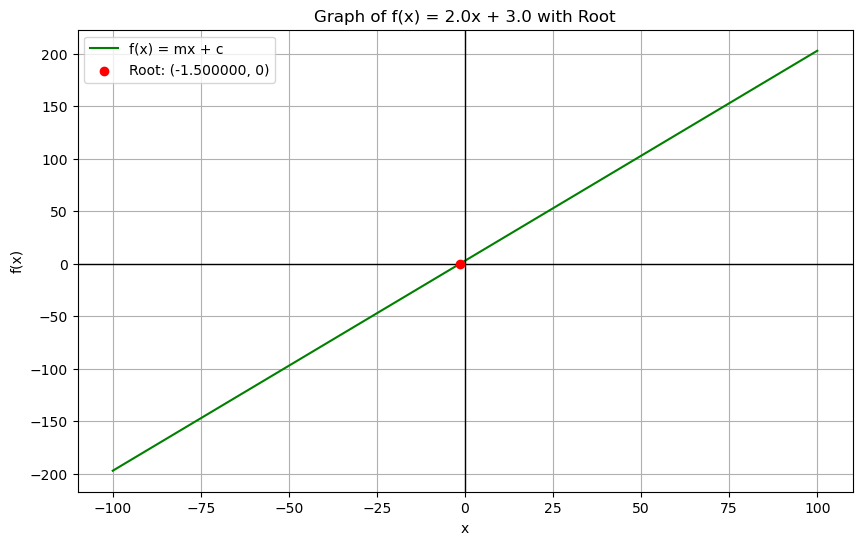

In [12]:
print("\nPlotting the function f(x) = mx + c and marking the root...\n")
# Define x values for plotting the function
x_vals = np.linspace(x_min, x_max, 400)
y_vals = f(x_vals)

# Plot the function f(x)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x) = mx + c", color="green")
plt.scatter(root, f(root), color="red", label=f"Root: ({root:.6f}, 0)", zorder=5)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.title(f"Graph of f(x) = {m}x + {c} with Root")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()